<a href="https://colab.research.google.com/github/mironafanasenko/pogect/blob/main/%D0%9C%D0%B8%D1%80%D0%BE%D0%BD_%D0%90%D1%84%D0%B0%D0%BD%D0%B0%D1%81%D0%B5%D0%BD%D0%BA%D0%BE_task28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://drive.google.com/uc?id=1PzNwE9OZHBCd2T9gax6x35JEWlxCaMU0" alt="МФТИ" align="right" width = '100' /> 
<br>
<br>
<br>
<strong><font color='006db6' size='7' face="Arial" >
<p align='center'>Анализ данных на Python. </strong></font>

<font color='006db6' size='6' face="Arial">
<p align='center'>Модуль 2. Python для анализа и визуализации данных</font>

<font color='006db6' size='4' face="Arial">
<p align='center'>преп. Лазарева Светлана Александровна <br> Lazareva.SA@mipt.ru <br>
teacher.ikt.2012@gmail.com</font>


# Занятие 28. Кластеризация. Решение задач.



Теоретический материал с описанием алгоритмов и задач кластеризации размещён в презентации к занятию.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error 
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import nan_euclidean_distances
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from ml import print_LR_MSE_score

## Использование метрик для выявления **похожих** объектов и заполнения пропущенных данных

На прошлом занятии мы разобрали алгоритм заполнения пропущенных данных на основе различных метрик. 

**Алгоритм 27.1**  


Пусть у некоторого объекта $x_i$ значение признака $x_{ij}$ не определено (nan, некорректное значение, пропуск и т.д.).


1.   Временно исключим из матрицы $x$ $j$-ый столбец (предполагая, что остальные ячейки в таблице нормальные). 
2.   Найдем расстояния (с помощью любой из рассмотренных метрик) от строки $x_i$ до остальных объектов таблицы. Получим $M$  матрицу расстояний. 

3. 
$$x_{ij}  = \frac{1}{\displaystyle\sum_{k=1}^{m}{\frac {1}{M_{ik}}}}\displaystyle\sum_{k=1}^{m}\frac {x_{kj}}{M_{ik}} 
$$





##Задание 27.6 *

Напишите универсальную функцию `fill_data(X, metric)`, которая получает на вход матрицу X, содержащую числовые значения и название метрики. Функция заполняет все пропущенные числовые значения в матрице X по алгоритму 27.1. 

Давайте обобщим это задание и напишем сразу функцию, которая заполняет пропущенные значения во всей матрице, даже в такой, где много пропущенных значений в одном столбце. 

##Универсальная функция `fill_nan(X)`

In [ ]:
X = np.array([[5., 5.,     5.,      3], 
              [5., 3.,     np.nan,  4], 
              [2., np.nan, np.nan,  5], 
              [3., 4.,     4,      np.nan]])

Сначала попробуем поэкспериментировать, а потом соберём результаты в одну функцию.



```
# Выбран кодовый формат

```
# Выбран кодовый формат
```


```

Начнейм с матрицы расстояний.

In [ ]:
M = nan_euclidean_distances(X)

Найдём позиции пропущенных значений.

In [ ]:
M

array([[0.        , 2.5819889 , 5.09901951, 2.82842712],
       [2.5819889 , 0.        , 4.47213595, 3.16227766],
       [5.09901951, 4.47213595, 0.        , 2.        ],
       [2.82842712, 3.16227766, 2.        , 0.        ]])

In [ ]:
np.where(np.isnan(X))

(array([1, 2, 2, 3]), array([2, 1, 2, 3]))

In [ ]:
II, JJ = np.where(np.isnan(X))

In [ ]:
i = 0
mask = M[i, :] != 0

In [ ]:
mask

array([False,  True,  True,  True])

Фактически мы оказались в ситуации, когда определены `i` и `j` для решения задания 27.5, что мы писали на прошлом занятии. Попробуем обобщить его так, чтобы тот алгоритм работал в условии, когда надо работать с nan-значениями.   
Во-первых, зафиксируем метрику, которая умеет это делать - `nan_euclidean_distances()`.   
Во-вторых, вместо `np.sum()` будем использовать `np.nansum()`. 

In [ ]:
def fill_nan(X):
    """ 
    Заполняет все nan-значения в нормализованном 
    двумерном массиве X (np.array()) в соответствии с алгоритмом 27.1. 
    Возвращает полученный массив.

    """
    M = nan_euclidean_distances(X)
    II, JJ = np.where(np.isnan(X))
    for i, j in zip(II, JJ):
        mask = M[i, :] != 0
        z = np.nansum(1/M[i, mask])
        s = np.nansum(X[mask, j]/M[i, mask])
        X[i, j] = s/z
  
    return X
    

In [ ]:
X

array([[ 5.,  5.,  5.,  3.],
       [ 5.,  3., nan,  4.],
       [ 2., nan, nan,  5.],
       [ 3.,  4.,  4., nan]])

In [ ]:
fill_nan(X)

array([[5.        , 5.        , 5.        , 3.        ],
       [5.        , 3.        , 3.45301385, 4.        ],
       [2.        , 3.97010984, 4.08024842, 5.        ],
       [3.        , 4.        , 4.        , 4.12519146]])

##**Задание 27.7**

В файле cwur_2019.csv находится таблица Мирового рейтинга университетов за 2019-2020 годы. К сожалению, не все значения заполнены корректно. Поэтому: 



1.   Постарайтесь заполнить пропущенные значения в матрице исходя из алгоритма 27.1 или 27.2 .  
2.   Постройте модель линейной регрессии для предсказания признака score.  

Улучшился ли коэффициент детерминации модели и MSE в стравнении с решением задания 26.6?







 

In [ ]:
df = pd.read_csv("cwur_2019.csv")

NameError: ignored

Заменим пропуски на `np.nan`.

In [ ]:
df = df.replace('-', np.nan)

In [ ]:
for c in col:  ## здесь с col проблема. 
  df[c] = pd.to_numeric(df[c])
  
  ##df[c] = pd.to_number(df[c])

  ## не подскажете в чём здесь ошибка

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   location              2000 non-null   object 
 3   national_rank         2000 non-null   int64  
 4   education_quality     418 non-null    object 
 5   alumni_employment     952 non-null    object 
 6   faculty_quality       247 non-null    object 
 7   research_performance  1946 non-null   object 
 8   score                 2000 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 140.8+ KB


In [ ]:
col = ['education_quality', 'alumni_employment',]

In [ ]:
df.location

0                  USA
1                  USA
2                  USA
3       United Kingdom
4       United Kingdom
             ...      
1995           Austria
1996         Argentina
1997             India
1998            Turkey
1999          Pakistan
Name: location, Length: 2000, dtype: object

## Кодирование категориальных признаков

Категориальные признаки могут содержать информацию, в значительной степени влияющую на прогноз. Поэтому их следует преобразовать в числовые. 

Используем для этого готовый класс.

In [ ]:
enc = OrdinalEncoder()

In [ ]:
T = np.array([['male', 'US'],
              ['female', 'Russia']])

In [ ]:
enc.fit(T)

OrdinalEncoder()

In [ ]:
enc.transform(T)

array([[1., 1.],
       [0., 0.]])

In [ ]:
locs = df.location.values

In [ ]:
enc.fit(locs.reshape(-1, 1))

OrdinalEncoder()

In [ ]:
locs = enc.transform(locs.reshape(-1,1))

In [ ]:
df.location = locs

In [ ]:
df.head()

,world_rank,institution,location,national_rank,education_quality,alumni_employment,faculty_quality,research_performance,score
0,1,Harvard University,89.0,1,2,1,1,1,100.0
1,2,Massachusetts Institute of Technology,89.0,2,1,10,2,5,96.7
2,3,Stanford University,89.0,3,9,3,3,2,95.2
3,4,University of Cambridge,93.0,1,4,19,5,11,94.1
4,5,University of Oxford,93.0,2,10,24,10,4,93.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   world_rank            2000 non-null   int64  
 1   institution           2000 non-null   object 
 2   location              2000 non-null   float64
 3   national_rank         2000 non-null   int64  
 4   education_quality     418 non-null    object 
 5   alumni_employment     952 non-null    object 
 6   faculty_quality       247 non-null    object 
 7   research_performance  1946 non-null   object 
 8   score                 2000 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 140.8+ KB


In [ ]:
df.drop(['world_rank','institution'], axis = 1, inplace = True)

In [ ]:
y = df['score'].values

In [ ]:
type(y)

numpy.ndarray

In [ ]:
df.drop(['score'], axis = 1, inplace = True)

In [ ]:
df

,location,national_rank,education_quality,alumni_employment,faculty_quality,research_performance
0,89.0,1,2,1,1,1
1,89.0,2,1,10,2,5
2,89.0,3,9,3,3,2
3,93.0,1,4,19,5,11
4,93.0,2,10,24,10,4
...,...,...,...,...,...,...
1995,4.0,17,NaN,NaN,NaN,1931
1996,1.0,11,NaN,NaN,NaN,1932
1997,34.0,68,505,1035,NaN,1942
1998,88.0,61,NaN,NaN,NaN,1933


##Масштабирование данных

Мы использовали собственные функции для нормализации (масштабирования) данных. Теперь используем классы, объявленные в `sklearn.preprocessing`.

###StandardScaler() 

In [ ]:
A = np.array([[10, 100, 1], 
              [50, 950, 0.5], 
              [99, 290, 0.2]])

In [ ]:
scaler = StandardScaler()
A_scaled = scaler.fit_transform(A)


In [ ]:
A_scaled

array([[-1.18144947, -0.95168847,  1.31319831],
       [-0.08242671,  1.38177845, -0.20203051],
       [ 1.26387618, -0.43008998, -1.1111678 ]])

###MinMaxScaler()

In [ ]:
scaler = MinMaxScaler()
A_scaled = scaler.fit_transform(A)

In [ ]:
A_scaled

array([[0.        , 0.        , 1.        ],
       [0.4494382 , 1.        , 0.375     ],
       [1.        , 0.22352941, 0.        ]])

Используем штатную нормализацию данных - MinMaxScaler() для набора данных с рейтингом ВУЗов. 

In [ ]:
X = df.values

In [ ]:
X

array([[89.0, 1, '2', '1', '1', '1'],
       [89.0, 2, '1', '10', '2', '5'],
       [89.0, 3, '9', '3', '3', '2'],
       ...,
       [34.0, 68, '505', '1035', nan, '1942'],
       [88.0, 61, nan, nan, nan, '1933'],
       [62.0, 11, nan, nan, nan, '1934']], dtype=object)

In [ ]:
X.shape

(2000, 6)

In [ ]:
X_minmax = scaler.fit_transform(X)

In [ ]:
X_minmax

array([[1.        , 1.        , 1.        , 0.        ],
       [1.        , 0.        , 0.        , 0.5       ],
       [0.        , 0.48505492, 0.40545584, 1.        ],
       [0.33333333, 0.5       , 0.3535818 , 0.56259573]])

Удалим пропущенные значения.

In [ ]:
X_withoutnan = fill_nan(X_minmax)

In [ ]:
x = X_withoutnan

Разобьем выборки на тренировочную и тестовую. 

In [ ]:
x_train,x_test, y_train, y_test = \
train_test_split(x,y,test_size= 0.3, random_state = 42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Построим модель линейной регрессии.

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

Посмотрим характеристики модели.

In [ ]:
print_LR_MSE_score(model, x_test,y_test)

w = [  0.38842205  -0.72981105   0.23062408  -2.36744743   2.863757
 -14.34066222] 
MSE = 3.7087553213307776 
Score = 0.8394667008516299


Попробуем другой вариант нормализации

In [ ]:
scaler = StandardScaler()


Есть улучшение показателей.  Но имеет смысл попробовать заполнить пропущенные значения другим алгоритмом. 

##Задание 28.1*  
Попробуйте поэкспериментировать - удалить  из набора данных с рейтингом ВУЗов столбцы, в которых изначально больше 40% значений пропущены. Заполните пропущенные значения в остальных столбцах. Постройте похожим способом модель линейной  регрессии и сравните показатели полученной модели. Они улучшились?


##*Использование коэффициента корреляции для восстановления пропущенных данных*


Коэффициент корреляции показывает, как сильно значения одного признака влияют на значения других признаков, фактически он показывает некоторую меру близости признаков.


### Использование корреляции столбцов
**Алгоритм 27.2**

Пусть $X$ - матрица нецелевых признаков, содержащая $n$ строк (по числу объектов) и $m$ столбцов (по числу признаков). 

И пусть признак $x_{ij}$ не определен. Это соответствует тому, что для объекта $i$ значение признака $j$ либо пропущено, либо равно nan. 

Тогда, зная корреляцию столбца $j$ с остальными признаками (столбцами), можно заполнить (восстановить) значение $x_{ij}$ по следующей формуле.

$$
x_{ij}  = \overline{x_j} + \frac{\displaystyle\sum_{k=1}^{m} {corr(x_k,x_j)(x_{ik} - \overline{x_k})}}
{\displaystyle\sum_{k=1}^{m} {|corr(x_k,x_j)|}},    k\neq j
$$

где 
$ \overline{x_j}$ - среднее значение признака  $j$,  
$ \overline{x_k}$ - среднее значение признака  $k$,  
$ corr(x_k,x_j) $ - коэффициент корреляции между $k$-ым и $j$-тым признаками.  

### Использование корреляции строк 

Корреляция столбцов демонстировала нам близость признаков, а что будет показывать для той же матрицы корреляция строк?  



Сначала посмотрим на матрицу. Дает ли нам какую-то информацию столбец, если все его значения для всех объектов одинаковы? 


Дает ли нам какую-то информацию строка, если все её значения одинаковы?

И можно ли для таких матриц искать корреляции столбцов и строк?  

Рассмотрим примеры. 


In [ ]:
X = np.array([[4., 3., 5., 4], 
              [5., 4., 6., 5], 
              [5., 5., 4., 5], 
              [5., 4., 5., 5.]])

In [ ]:
np.isin(0, X.var(axis = 1))

array(False)

In [ ]:
# Определить, что есть строка с одинаковыми значениями
if np.isin(0, X.var(axis = 0)):
  print('Построение матрицы не возможно')
else: M = np.corrcoef(X)

In [ ]:
M

array([[ 1.        ,  1.        , -0.81649658,  0.81649658],
       [ 1.        ,  1.        , -0.81649658,  0.81649658],
       [-0.81649658, -0.81649658,  1.        , -0.33333333],
       [ 0.81649658,  0.81649658, -0.33333333,  1.        ]])

In [ ]:
df = pd.DataFrame(x)

In [ ]:
df.corr()        # вычисляет коэффициенты корреляции по строкам, и не работает,
                # если есть строка с одинаковыми значениями

,0,1,2,3
0,1.000000,0.014234,0.147514,-0.839588
1,0.014234,1.000000,0.985351,-0.512886
2,0.147514,0.985351,1.000000,-0.594210
3,-0.839588,-0.512886,-0.594210,1.000000


Вспомним, как интерпретировать показатели корреляции. В нашей матрице `X` нулевая и первая строки коррелируют.  

In [ ]:
X = np.array([[4., 3., 5., 5], 
              [5., 4., 6., 5], 
              [5., 4., 5., 5], 
              [5., 4., 5., 5.]])

np.corrcoef(X) # вычисляет коэффициенты корреляции по строкам

In [ ]:
# Определить, что есть столбец с одинаковыми значениями


In [ ]:
df = pd.DataFrame(X)

In [ ]:
df.corr()     # вычисляет коэффициенты корреляции по столбцам, и не работает, 
              # если есть столбец с одинаковыми значениями 

Соответственно, функция `df.corr()` тоже не умеет работать в условии, когда все значения какого-то признака **одинаковы**.
А нужен ли нам вообще такой признак?

###Вывод
До применения Алгоритма 27.2 следует убедиться, что матрица удовлетворяет требованиям. В зависимости от применяемой функции  или метода  в матрице не должно быть:   
Для `corrcoef(X)`  - строк, все значения которой равны между собой.  
Для `corr()` - столбцов, все значения которого равны между собой.

#Кластеризация

Кластеризация (англ. cluster analysis) — задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию.

Прежде, чем писать собственный алгоритм кластеризации, давайте напишем несколько функций для визуализации этого процесса.   

Пусть у нас есть 4 объекта с признаками, см. матрицу `X.`

In [ ]:
X = np.array([[1., 1.], 
              [2., 0], 
              [1., 6.], 
              [4., 0.]])

Посмотрим, как они разбросаны. 

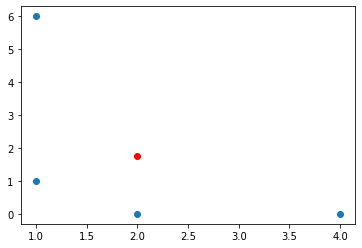

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.plot(X[:, 0].mean(), X[:, 1].mean(), 'ro');

##Задание 28.1  
Напишите функцию `draw_circle(center, R)`, которая рисует в плоскости окружность с центром в точке `center`   радиуса `R`. Кортеж `center` содержит два числа - координаты центра `(x, y)`.

In [ ]:
def draw_circle(center, R):
    plt.figure(figsize = (4,4))
    angle = np.linspace(0,2*np.pi,100)
    plt.plot(center[0]+R*np.cos(angle),center[1]+R*np.sin(angle), 'r')
    return 0

0

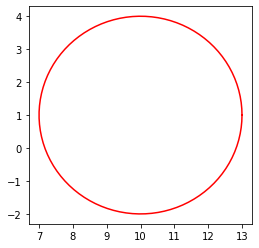

In [ ]:
draw_circle((10,1), 3)

##Задание 28.2  
Напишите функцию `find_centroid(X, c)`, которая возвращает центр тяжести (центроид) для объектов массива `X`, перечисленных в списке c. C - список индексов строк.  

In [ ]:
def find_centroid(X, c):
    """ 
    """
    return X[c].mean(axis = 0)

In [ ]:
find_centroid(X, [0, 1,2])

array([1.33333333, 2.33333333])

In [ ]:
X

array([[1., 1.],
       [2., 0.],
       [1., 6.],
       [4., 0.]])

***Курсив:***## Алгоритм нахождения одного кластера для FOREL

In [ ]:
def find_cluster(X, R, f):

    return c

In [ ]:
X = np.array([[1., 1.], 
              [2., 0], 
              [1., 6.], 
              [4., 0.],
              [3., 5],
              [4, 4],
              [3, 4],
              [1.5, 5],
              [2, 4],
              [1.5, 3],
              [3.5, 2]])

In [ ]:
f = np.random.randint(X.max(), size=2)


In [ ]:
c1 = find_cluster(X, 3, f)

In [ ]:
c1

##Задание 28.3*  
Обобщите алгоритм. Напишите функцию `find_all_clusters(X, R)`, которая возвращает список кластеров для  массива `X` и параметра R.  

##Задание 28.4*   
Напишите функцию `fill_nan_corr(X)`, заполняет пропущенные значения массива X на основе алгоритма 27.2. Вы можете выбрать сами, использовать корреляцию объектов или корреляцию признаков. 

## Дополнительные ссылки по теме 

**Numpy**

*   [Numpy. Постановка задачи машинного обучения. Видео-урок](https://www.youtube.com/watch?v=Z_j_orFpJVI)

*   [Библиотека Numpy. Полезные инструменты  Текстовый урок](https://devpractice.ru/numpy-useful-functions/)

*   [Сколько памяти используют ваши объекты Python. Статья](https://code.tutsplus.com/ru/tutorials/understand-how-much-memory-your-python-objects-use--cms-25609)

*  [Наглядно о том, как работает NumPy Статья (перевод статьи Jay Alammar) с  хорошими картинками 8-)](https://habr.com/ru/company/skillfactory/blog/564240/)
*  [Справочное руководство по NumPy на русском языке](https://pyprog.pro/reference_manual.html)
*  [Справочник по NumPy c mipt.ru](http://acm.mipt.ru/twiki/bin/view/Cintro/PythonNumpy)
*  [Краткое описание math. Справочник на русском языке](https://pythonchik.ru/matematika/modul-math-v-python) 

*   [Статья с примерами про numpy.isclose() (на английском языке) 
](https://www.pythonpool.com/numpy-isclose/)

**Машинное обучение**
*   Книга  Уэс Маккинли "Python и анализ данных"/ Пер. с англ. Слинкин А. А. - М.: ДМК Пресс, 2015. - 482 с.
*   [Машинное обучение для людей (с прекрасными картинками) 
](https://vas3k.ru/blog/machine_learning/)
*   [Курс на YouTube Машинное обучение 1 (преп. Е. Соколов, ВШЭ)
](https://www.youtube.com/playlist?list=PLEqoHzpnmTfChItexxg2ZfxCsm-8QPsdS)
*   [Андрей Хлевнюк. Основы линейной регрессии. Статья на Хабр.
](https://habr.com/ru/post/514818/)

*   [Вычисление коэффициента корреляции Пирсона в Python с помощью Numpy.
](https://pythobyte.com/calculating-pearson-correlation-coefficient-in-python-with-numpy-c7357af3/)

*   [Обзор методов кластеризации из sklearn (рус.).](https://scikit-learn.ru/clustering/)

